# **Atividade 1 - Análise de falhas**

## 01 - Bibliotecas

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


## 02 - Parâmetros de falha dos equipamentos

In [2]:
# - Average of last USP number
N = (6+3+0)/3

# - MTB information for each component
MTBFPF = (50+N)*100
MTBFSH = 5000
MTBFAT = 2000*N/2
MTBFXM = 5500
MTBFMO = 3800
MTBFBIT = 5000
MTBFSF = 100000

# - Lambda parameter for each component
lambPF = 1/MTBFPF   # - Pedal de freio
lambSH = 1/MTBFSH   # - Sistema hidráulico
lambAT = 1/MTBFAT   # - Atuador
lambXM = 1/MTBFXM   # - XMON
lambMO = 1/MTBFMO   # - Monitor
lambBIT = 1/MTBFBIT # - BIT
lambSF = 1/MTBFSF   # - Sistema de freio

# - Operational time
time = 15/60        # - Tempo [h]

# - Print of failure probability
print("Pedal de freios: " + str(lambPF*time) + "\n",
      "Sistema hidráulico: " + str(lambSH*time) + "\n",
      "Atuador: " + str(lambAT*time) + "\n",
      "Sistema de freio: " + str(lambSF*time) + "\n",
      "BIT: " + str(lambBIT*time) + "\n",
      "XMON: " + str(lambXM*time) + "\n",
      "Monitor: " + str(lambMO*time) + "\n")

Pedal de freios: 4.7169811320754715e-05
 Sistema hidráulico: 5e-05
 Atuador: 8.333333333333333e-05
 Sistema de freio: 2.5e-06
 BIT: 5e-05
 XMON: 4.545454545454545e-05
 Monitor: 6.578947368421052e-05



## 03 - Teste de configurações

### 03.1 - Configuração básica



In [3]:
# Group 1
P1conj1 = lambPF*time+lambSH*time
P1conj2 = lambPF*time+lambSH*time

P1 = P1conj1*P1conj2
print(P1conj1, P1conj2)
# Group 2
# OR - 2 SH
P2 = lambAT*time

# Group 3
# OR - 1 AT
P3 = lambSF*time

# Total
# AND
Ptot = (P1+P2+P3)
print(P1, P2, P3, Ptot)

9.716981132075472e-05 9.716981132075472e-05
9.441972232111072e-09 8.333333333333333e-05 2.5e-06 8.584277530556544e-05


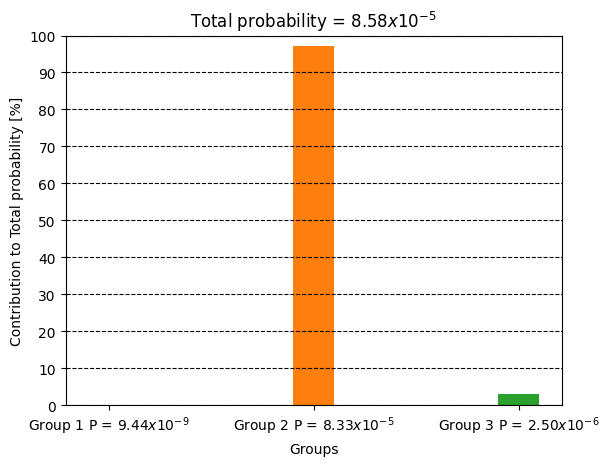

In [4]:
fig, ax = plt.subplots()

bar_width = 0.2
cat = ["Group 1", "Group 2", "Group 3"]
coefficient1, exponent1 = ("%.2e" % P1).split("e")
coefficient2, exponent2 = ("%.2e" % P2).split("e")
coefficient3, exponent3 = ("%.2e" % P3).split("e")
text1 = "$%s x 10^{%d}$" % (coefficient1, int(exponent1))
text2 = "$%s x 10^{%d}$" % (coefficient2, int(exponent2))
text3 = "$%s x 10^{%d}$" % (coefficient3, int(exponent3))


prob = np.array([P1, P2, P3]) / Ptot
# Create the bar plot
bar1 = ax.bar(cat[0] + " P = " + text1, 100*prob[0], bar_width)
bar2 = ax.bar(cat[1] + " P = " + text2, 100*prob[1], bar_width)
bar3 = ax.bar(cat[2] + " P = " + text3, 100*prob[2], bar_width)

ax.set_xlabel('Groups')
ax.set_ylabel('Contribution to Total probability [%]')
ax.set_yticks(np.linspace(0,100,11))
ax.set_ylim(0,100)
ax.grid(axis='y', color='k', ls='--')
coefficient, exponent = ("%.2e" % Ptot).split("e")

ax.set_title("Total probability = $%s x 10^{%d}$" % (coefficient, int(exponent)))
plt.savefig("graph_arq1.png")
plt.show()

### 03.2 - Configuração com mudança no grupo 2

In [5]:
# - New config
# Group 1
# OR - 2 PF
P1 = (lambPF*time+lambSH*time)**2

# Group 2
# OR - 2 AT
P2 = (lambAT*time)**2

# Group 3
# OR - 2 SF
P3 = (lambSF*time)

# Total
# AND
Ptot = P1+P2+P3
print(P1, P2, P3, Ptot)

9.441972232111072e-09 6.944444444444444e-09 2.5e-06 2.5163864166765557e-06


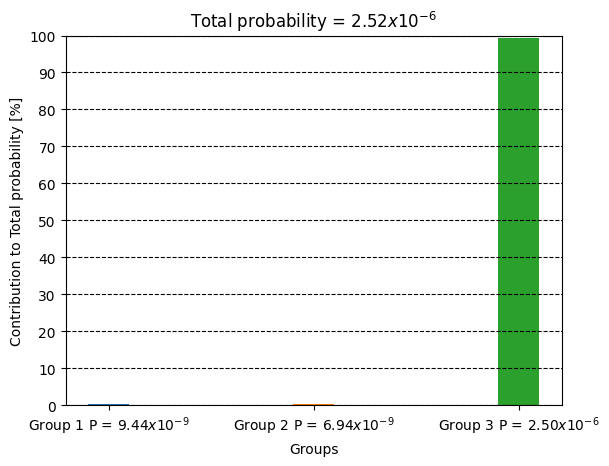

In [6]:
fig, ax = plt.subplots()

bar_width = 0.2
cat = ["Group 1", "Group 2", "Group 3"]
coefficient1, exponent1 = ("%.2e" % P1).split("e")
coefficient2, exponent2 = ("%.2e" % P2).split("e")
coefficient3, exponent3 = ("%.2e" % P3).split("e")
text1 = "$%s x 10^{%d}$" % (coefficient1, int(exponent1))
text2 = "$%s x 10^{%d}$" % (coefficient2, int(exponent2))
text3 = "$%s x 10^{%d}$" % (coefficient3, int(exponent3))


prob = np.array([P1, P2, P3]) / Ptot
bar1 = ax.bar(cat[0] + " P = " + text1, 100*prob[0], bar_width)
bar2 = ax.bar(cat[1] + " P = " + text2, 100*prob[1], bar_width)
bar3 = ax.bar(cat[2] + " P = " + text3, 100*prob[2], bar_width)

ax.set_xlabel('Groups')
ax.set_ylabel('Contribution to Total probability [%]')
ax.set_yticks(np.linspace(0,100,11))
ax.set_ylim(0,100)
ax.grid(axis='y', color='k', ls='--')
coefficient, exponent = ("%.2e" % Ptot).split("e")

ax.set_title("Total probability = $%s x 10^{%d}$" % (coefficient, int(exponent)))
plt.savefig("graph_arq2.png")
plt.show()

### 03.3 - Configuração com adição do monitoramento

### 03.3.1 - Caso não-anunciado

In [15]:
# - New config 3
# Group 1
# OR - 2 PF - Bit em um sistema hidráulico e em um pedal de freio
P1_11 = lambBIT*time*(lambPF*time)
P1_12 = lambBIT*time*(lambSH*time)
P1_1 = P1_11 + P1_12
P1 = P1_1*(lambPF*time + lambSH*time)

print(P1_11, P1_12, P1_1)
# Group 2
# OR - 2 AT
P2_1 = lambBIT*time * lambAT*time
P2 =P2_1*(lambAT*time)
print(P2_1)

# Group 3
# OR - 2 SF
P3 = (lambSF*time)*lambBIT*time

# Total
# AND
Ptot = P1+P2+P3
print("P1 = " + str(P1) + "\n", "P2 = " + str(P2) + "\n", str(P3) + "\n","Ptot = " + str(Ptot)+"\n")

2.358490566037736e-09 2.5e-09 4.858490566037736e-09
4.166666666666667e-09
P1 = 4.720986116055537e-13
 P2 = 3.472222222222222e-13
 1.25e-10
 Ptot = 1.258193208338278e-10



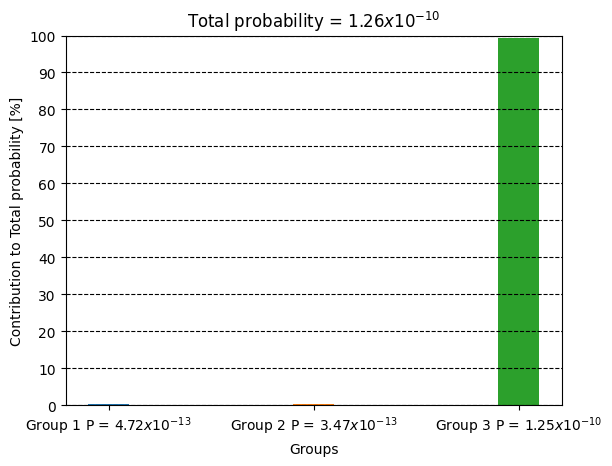

In [8]:
fig, ax = plt.subplots()

bar_width = 0.2
cat = ["Group 1", "Group 2", "Group 3"]
coefficient1, exponent1 = ("%.2e" % P1).split("e")
coefficient2, exponent2 = ("%.2e" % P2).split("e")
coefficient3, exponent3 = ("%.2e" % P3).split("e")
text1 = "$%s x 10^{%d}$" % (coefficient1, int(exponent1))
text2 = "$%s x 10^{%d}$" % (coefficient2, int(exponent2))
text3 = "$%s x 10^{%d}$" % (coefficient3, int(exponent3))


prob = np.array([P1, P2, P3]) / Ptot
bar1 = ax.bar(cat[0] + " P = " + text1, 100*prob[0], bar_width)
bar2 = ax.bar(cat[1] + " P = " + text2, 100*prob[1], bar_width)
bar3 = ax.bar(cat[2] + " P = " + text3, 100*prob[2], bar_width)

ax.set_xlabel('Groups')
ax.set_ylabel('Contribution to Total probability [%]')
ax.set_yticks(np.linspace(0,100,11))
ax.set_ylim(0,100)
ax.grid(axis='y', color='k', ls='--')
coefficient, exponent = ("%.2e" % Ptot).split("e")

ax.set_title("Total probability = $%s x 10^{%d}$" % (coefficient, int(exponent)))

plt.savefig("graph_arq3.png")

plt.show()

### 03.2 - Caso anunciado

In [9]:
# - New config 3.2
# Group 1
# OR - 2 PF - Bit em um sistema hidráulico e em um pedal de freio
P1_11 = (1-lambBIT*time)*(lambPF*time)
P1_12 = (1-lambBIT*time)*(lambSH*time)
P1_1 = P1_11 + P1_12
P1 = P1_1*(lambPF*time + lambSH*time)

print(P1_11, P1_12, P1_1)
# Group 2
# OR - 2 AT
P2_1 = (1-lambBIT*time) * lambAT*time
P2 =P2_1*(lambAT*time)
print(P2_1)

# Group 3
# OR - 2 SF
P3 = (lambSF*time)*(1-lambBIT*time)
# Total
# AND
Ptot = P1+P2+P3
print("P1 = " + str(P1) + "\n", "P2 = " + str(P2) + "\n", str(P3) + "\n","Ptot = " + str(Ptot)+"\n")

4.7167452830188675e-05 4.9997500000000004e-05 9.716495283018867e-05
8.332916666666666e-05
P1 = 9.441500133499465e-09
 P2 = 6.944097222222222e-09
 2.4998750000000004e-06
 Ptot = 2.516260597355722e-06



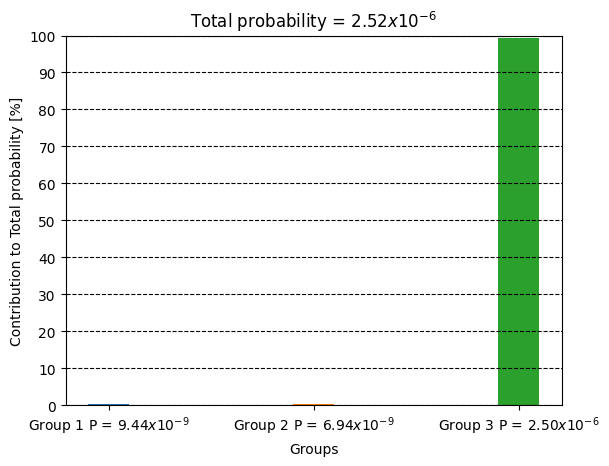

In [10]:
fig, ax = plt.subplots()

bar_width = 0.2
cat = ["Group 1", "Group 2", "Group 3"]
coefficient1, exponent1 = ("%.2e" % P1).split("e")
coefficient2, exponent2 = ("%.2e" % P2).split("e")
coefficient3, exponent3 = ("%.2e" % P3).split("e")
text1 = "$%s x 10^{%d}$" % (coefficient1, int(exponent1))
text2 = "$%s x 10^{%d}$" % (coefficient2, int(exponent2))
text3 = "$%s x 10^{%d}$" % (coefficient3, int(exponent3))


prob = np.array([P1, P2, P3]) / Ptot
bar1 = ax.bar(cat[0] + " P = " + text1, 100*prob[0], bar_width)
bar2 = ax.bar(cat[1] + " P = " + text2, 100*prob[1], bar_width)
bar3 = ax.bar(cat[2] + " P = " + text3, 100*prob[2], bar_width)

ax.set_xlabel('Groups')
ax.set_ylabel('Contribution to Total probability [%]')
ax.set_yticks(np.linspace(0,100,11))
ax.set_ylim(0,100)
ax.grid(axis='y', color='k', ls='--')
coefficient, exponent = ("%.2e" % Ptot).split("e")

ax.set_title("Total probability = $%s x 10^{%d}$" % (coefficient, int(exponent)))
plt.savefig("graph_arq32.png")

plt.show()